[Last time](linear-algebra-and-the-buckingham-pi-theorem.html) we showed that the Buckingham Pi theorem follows directly from one of the central results of linear algebra:
the [rank-nullity theorem](https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem).

The normal approach to dimensional analysis involves a certain amount of playing with the parameters, reorganizing them, and looking for their nondimensional combinations.
The understanding from a linear algebra standpoint suggests the possibility of making a computer perform dimensional analysis for you. This is not to say that the usual approach is bad. In fact, I suspect that it is still essential for getting a good feel for a set of equations.



The main tool we will use for automating dimensional analysis will be the Python symbolic algebra package Sympy. 
It is also possible to do the same operations with the more commonly used numpy package (indeed, an early version of this article did use numpy). 
However, Sympy uses arbitrary precision arithmetic, while numpy uses floating point arithmetic, making it subject to roundoff errors.
We expect our nondimensional numbers to involve small integer powers of the parameters,
and having the answers as floating point numbers makes these integers more of a pain to identify.

In [13]:
import sympy
sympy.init_printing()

The first step will be to describe what we mean be a parameter.
For this, we will be defining a lightweight class:

In [14]:
class Parameter(object):
    def __init__(self, symbol, units):
        self.symbol = symbol
        self.units = units

where `symbol` is a string that we will use for typesetting the final results and `units` is a Python dictionary that defines a mapping between a fundamental unit and the power of that unit in the parameter. For instance, we can define a parameter for the acceleration due to gravity $g$, which has units $\mathrm{m}/\mathrm{s}^2$ by writing

In [15]:
gravity = Parameter( 'g', {'m':1, 's':-2} )

or we can define a parameter for density $\rho$, which has units $\mathrm{kg}/\mathrm{m}^3$

In [16]:
density = Parameter( '\\rho', {'kg':1, 'm':-3})

In this instance the `symbol` string is the $\LaTeX$ symbol for $\rho$.

Okay, so we have a type defining the relevant information for a given parameter.
Now we need to be able to construct the dimension matrix described in the previous article. As a reminder, the dimension matrix is an $k$ by $n$ matrix, where $n$ is the number of parameters and $k$ is the number of fundamental units that appear in the parameters. The entries of the matrix are the exponent of the given unit in the given parameter.

The following function takes a list of `Parameter` objects. It constructs a sorted list of the fundamental units, allocates a Sympy matrix of the correct shape, and then fills the entries of the matrix:

In [17]:
def construct_dimension_matrix( parameters ):
    # Storing the units in a set means that we ignore
    # duplicate units, and will just have a set of all
    # the units which appear at least once in the problem:
    units = set()
    for p in parameters:
        for key in p.units:
            units.add(key)

    # The downside of a set is that it is unordered. It is
    # nice to have the units be alphabetized for easier 
    # inspection of the matrix, so we convert the units 
    # set to a list, then alphabetize that.
    units =list(units)
    units.sort()

    #Construct a matrix of the appropriate shape
    dimension_matrix = sympy.zeros( len(units), len(parameters) )
    
    for i,u in enumerate(units):
        for j,p in enumerate(parameters):
            # Determine the matrix entry for i,j
            # If the unit appears in the parameter,
            # then it is the power of that unit,
            # otherwise it is zero
            entry = p.units[u] if u in p.units else 0
            dimension_matrix[i,j] = entry

    return units, dimension_matrix

The `construct_dimension_matrix` function then returns the list of fundamental units and the dimension matrix for a set of parameters.

['kg', 'm', 's']


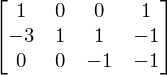

In [18]:
viscosity = Parameter( '\\eta', {'kg' : 1, 'm' : -1, 's' : -1} )
length = Parameter( 'D', {'m' : 1})
velocity = Parameter( 'u', {'m' : 1, 's': -1})

units, dimension_matrix = \
   construct_dimension_matrix( [density, length, velocity, viscosity])

print units
dimension_matrix